# Path Visualization

A quick tool to visualize the path produced by a YAML formatted graph.

### Load required modules

First install the required moules to be able to run this code

In [ ]:
!pip install git+https://github.com/mmayers12/data_tools

## YAML String

Please copy-paste your YAML for a DrugMechDB path below to have it visualized

In [1]:
yaml_string = """
directed: true
graph:
    disease: Keratitis
    disease_mesh: MESH:D007634
    drug: cortisone acetate
    drug_mesh: MESH:D003348
    drugbank: DB01380
links:
-   key: increases activity of
    source: MESH:D003348
    target: UniProt:P04150
-   key: negatively regulates
    source: UniProt:P04150
    target: UniProt:P23219
-   key: increases abundance of
    source: UniProt:P23219
    target: MESH:D011453
-   key: located in
    source: MESH:D011453
    target: GO:0006954
-   key: causes
    source: GO:0006954
    target: MESH:D007634
multigraph: true
nodes:
-   id: MESH:D003348
    label: Drug
    name: cortisone acetate
-   id: UniProt:P04150
    label: Protein
    name: Glucocorticoid receptor
-   id: UniProt:P23219
    label: Protein
    name: COX genes
-   id: MESH:D011453
    label: ChemicalSubstance
    name: Prostaglandins
-   id: GO:0006954
    label: BiologicalProcess
    name: Inflammation
-   id: MESH:D007634
    label: Disease
    name: Keratitis
reference: https://go.drugbank.com/drugs/DB01380#mechanism-of-action
"""

### Node color legend

Below we will draw the color legend for different node types

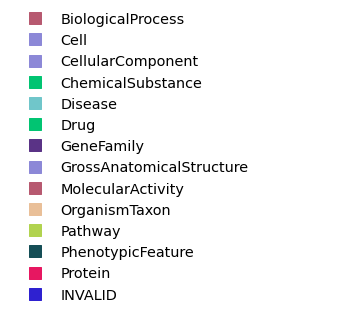

In [2]:
# Imports throw a couple warnings, so for cleanliness, suppress them.
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
from utils import plot_paths as pp

pp.plot_node_legend();

## Path Plot

Below the drug to disease path will be plotted.  If the path fails to plot, this may be due to some sort of syntax error in the above YAML. 

In the case of an error, please closely read the error message as it may give clues to the following:
 
 - Line number in the YAML text were error occured
 - Indentifier in question that is inconsistent between nodes/links
 
Also please ensure the colors for the node labels match that of those shown in the legend above, and not the INVALID color.

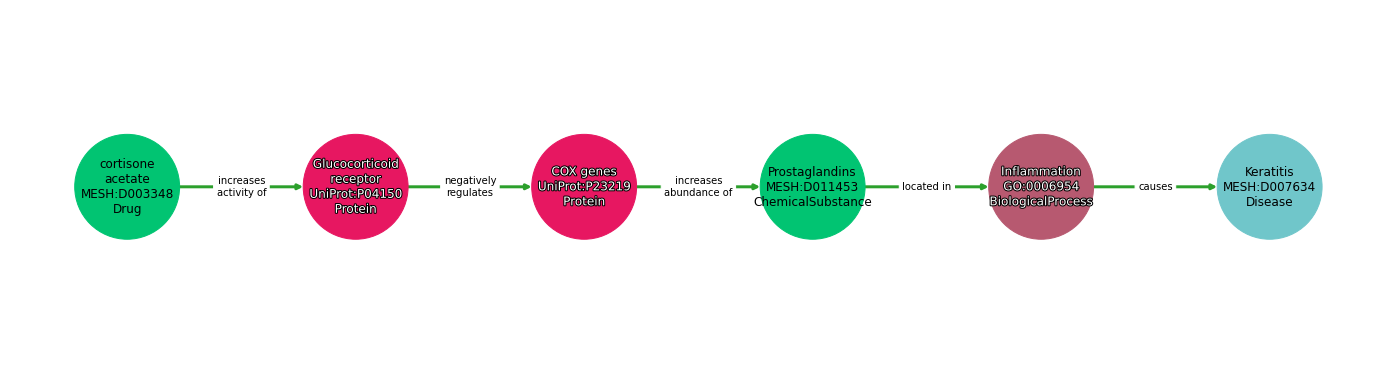

In [3]:
from io import StringIO

with StringIO(yaml_string) as f:
    path = nx.read_yaml(f)
    
pp.plot_path(path);